##Airbnb NYC Data analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**    - Abhishek pandey

# **Project Summary -**

The aim of this project was to analyze and gain insights from a dataset containing Airbnb listings data. The dataset consists of various columns including 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', and 'availability_365'.

The project followed several steps of exploratory data analysis (EDA) and data wrangling to gain a comprehensive understanding of the dataset and extract meaningful insights.

# **GitHub Link -**https://github.com/abhishek0478

# **Problem Statement**


Analyzing Factors Affecting Airbnb Prices and Occupancy Rates

The objective of this project is to analyze the Airbnb listings dataset and identify the key factors that influence the prices and occupancy rates of listings. By exploring the dataset, we aim to find the valuable insights.

We aim to provide valuable insights to both hosts and guests in the Airbnb ecosystem. Hosts can better understand the factors that affect their listing prices and occupancy rates, allowing them to optimize their pricing strategies and improve their listing's performance. Guests can gain insights into pricing trends, identify neighborhoods with affordable options, and make informed decisions when booking accommodations.



#### **Business Objective**

The business objective of this project is to provide actionable insights to Airbnb hosts that will enable them to optimize their hosting strategies, improve revenue generation, and increase occupancy rates.

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# Load Dataset
path = '/content/drive/MyDrive/Airbnb NYC 2019.csv'

In [7]:
df = pd.read_csv(path)
# Dataset First Look
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
# Dataset Duplicate Value Count
df.duplicated().sum()


0

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

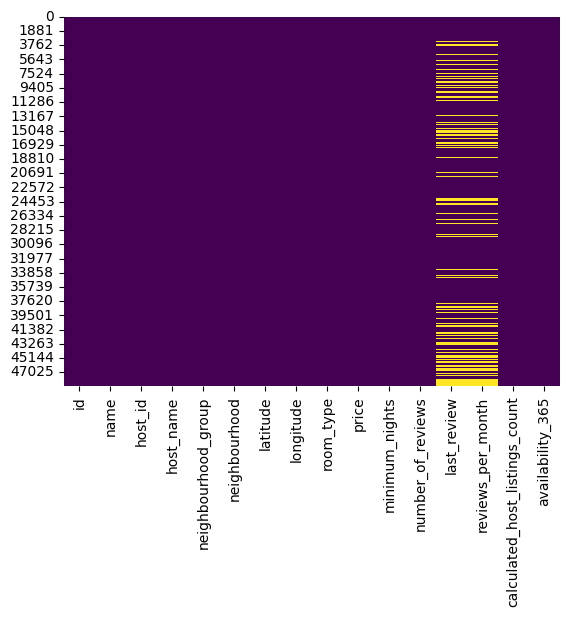

In [12]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)


In [13]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [15]:
# Check Unique Values for each variable.
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [16]:
#Drop unwanted columns from dataset.
df.drop(['last_review', 'reviews_per_month', 'latitude','longitude'], axis=1, inplace=True)


In [17]:
#DRop rows with null values
df.dropna(subset=['name','host_name'], inplace=True)


In [18]:
df.shape

(48858, 12)

#Data Visualization.


In [19]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

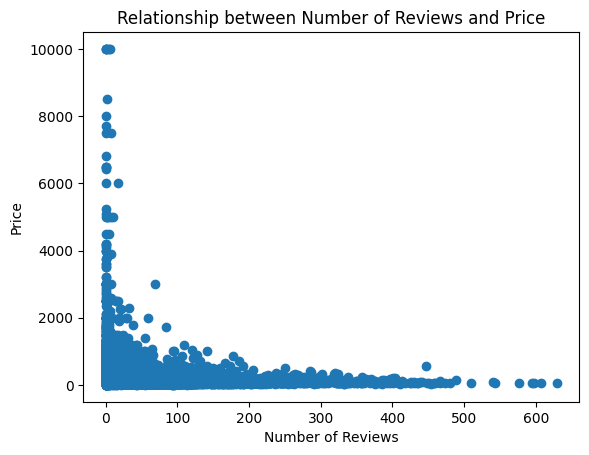

In [20]:
plt.scatter(df['number_of_reviews'], df['price'])
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Relationship between Number of Reviews and Price')
plt.show()


The scatter plot displays individual data points with the number of reviews on the x-axis and the corresponding prices on the y-axis.

It provides a visual representation of the relationship between the number of reviews and the price.

From above chart we can see that there is negative correlation between number of review and prices of the room.

Most reviews are given to the room with lower prices.

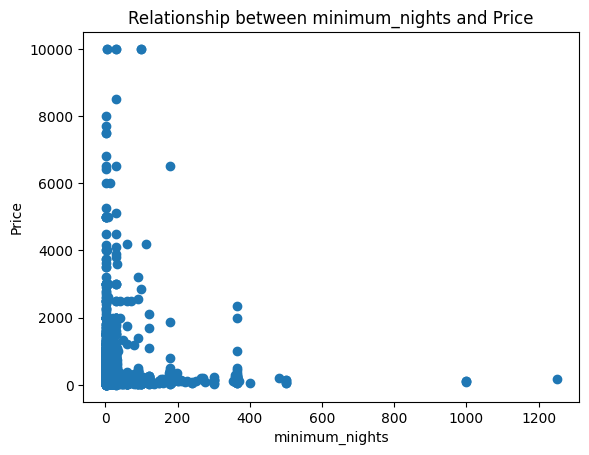

In [21]:
plt.scatter(df['minimum_nights'], df['price'])
plt.xlabel('minimum_nights')
plt.ylabel('Price')
plt.title('Relationship between minimum_nights and Price')
plt.show()

The scatter plot displays individual data points with the minimum nights on the x-axis and the corresponding prices on the y-axis.

It provides a visual representation of the relationship between the minimum nights and the price.

From above chart we can see that there is negative correlation between minimum nights and prices of the room.

Most people prefer room with less price for longer stay .

In [22]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Manhattan'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Queens'),
  Text(3, 0, 'Bronx'),
  Text(4, 0, 'Staten Island')])

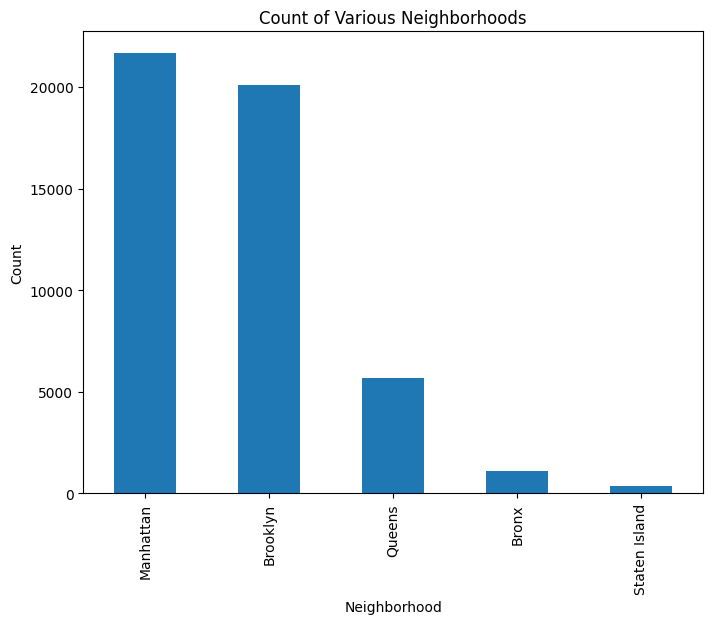

In [23]:
neighborhood_counts = df['neighbourhood_group'].value_counts()
plt.figure(figsize=(8, 6))
neighborhood_counts.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Count of Various Neighborhoods')
plt.xticks(rotation=90)


The bar chart displaying the count of each neighborhood. This visualization helps to understand the distribution of listings across different neighborhoods and identify any variations in the dataset.


From the above chart we can see that Manhattan shows the maximum count and Staten island shows minimum count for neighbourhood.

Text(0.5, 1.0, 'Host listing count')

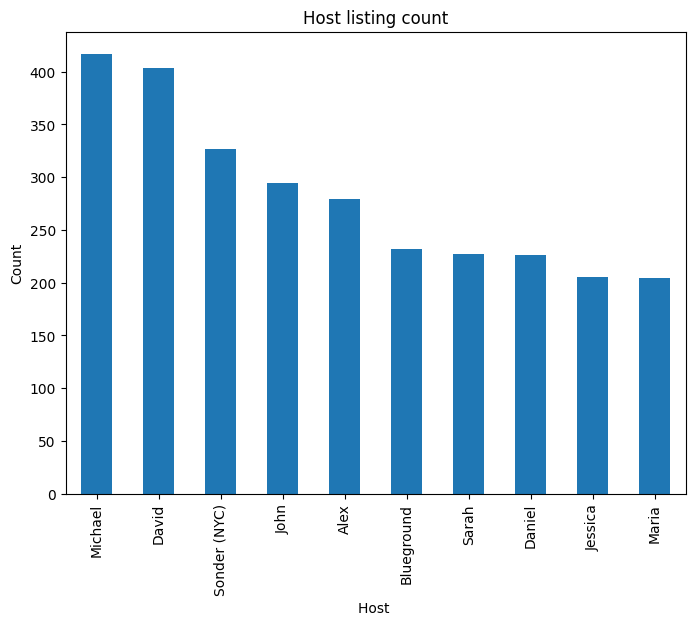

In [24]:
host_name = df['host_name'].value_counts().head(10)
plt.figure(figsize=(8, 6))
host_name.plot(kind='bar')
plt.xlabel('Host ')
plt.ylabel('Count')
plt.title('Host listing count')


Text(0.5, 1.0, 'Distribution of availability of rooms for Different Room Types')

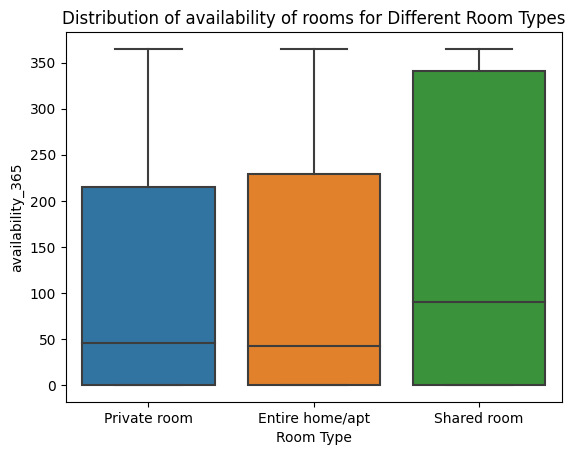

In [25]:
sns.boxplot(x='room_type', y='availability_365', data=df)
plt.xlabel('Room Type')
plt.ylabel('availability_365')
plt.title('Distribution of availability of rooms for Different Room Types')


The box plot displays the median, quartiles, and any outliers for each room type,it allows to compare central tendency and spread of room availability .

From the above chart we can see that availability of shared rooms are more than other room types.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Brooklyn'),
  Text(1, 0, 'Manhattan'),
  Text(2, 0, 'Queens'),
  Text(3, 0, 'Staten Island'),
  Text(4, 0, 'Bronx')])

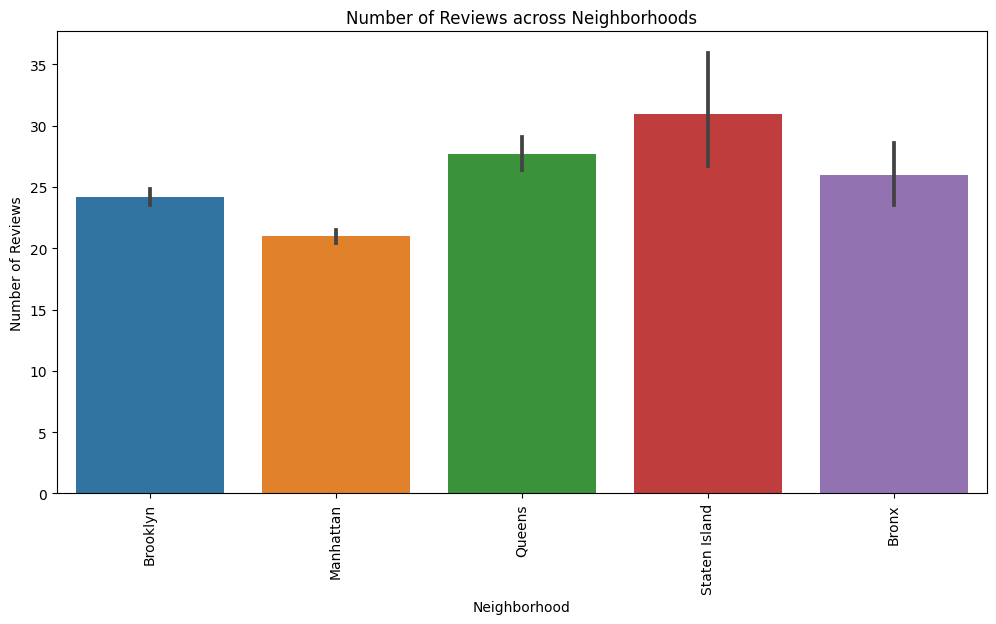

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_group', y='number_of_reviews', data=df)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews across Neighborhoods')
plt.xticks(rotation=90)


Text(0.5, 1.0, 'Preferred stay by Room Type')

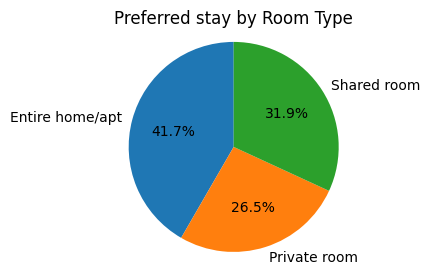

In [27]:
room_type_minimum_nights = df.groupby('room_type')['minimum_nights'].mean()
plt.figure(figsize=(4, 3))
plt.pie(room_type_minimum_nights, labels=room_type_minimum_nights.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Preferred stay by Room Type')


 The pie chart displaying the distribution of minimum nights for each room type. This visualization helps to understand the proportion of minimum nights for different room types in the dataset.

From the above chart we can say that most people prefer Entire home/apt instead of other two room types.

Text(0.5, 1.0, 'Most preferred neighbourhood group')

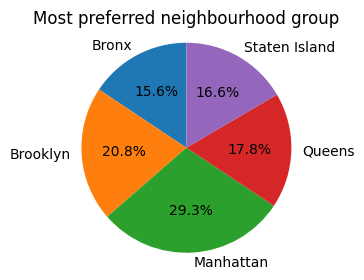

In [28]:
Neighbourhood_group_minimum_nights = df.groupby('neighbourhood_group')['minimum_nights'].mean().head(5)
plt.figure(figsize=(4, 3))
plt.pie(Neighbourhood_group_minimum_nights, labels=Neighbourhood_group_minimum_nights.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Most preferred neighbourhood group')

Text(0.5, 1.0, 'Room Types')

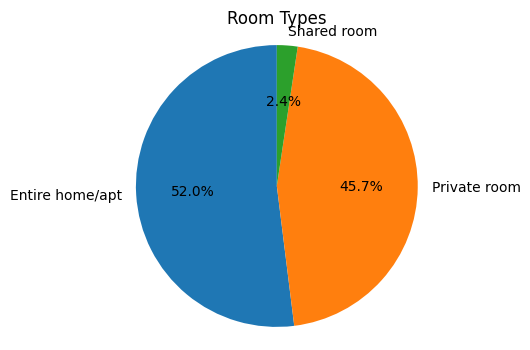

In [29]:
room_type_counts = df['room_type'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Room Types')



The pie chart that displays the distribution of room types. Each slice represents a room type, and the size of the slice indicates the proportion of that room type in the dataset.

From the above chart we can say that 52% room types are of Entire home/apt, the approx 45% are private room and 2.4% are shared room.

<ipython-input-30-e138aaf4e20e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], shade=True)


Text(0.5, 1.0, 'Distribution of Price')

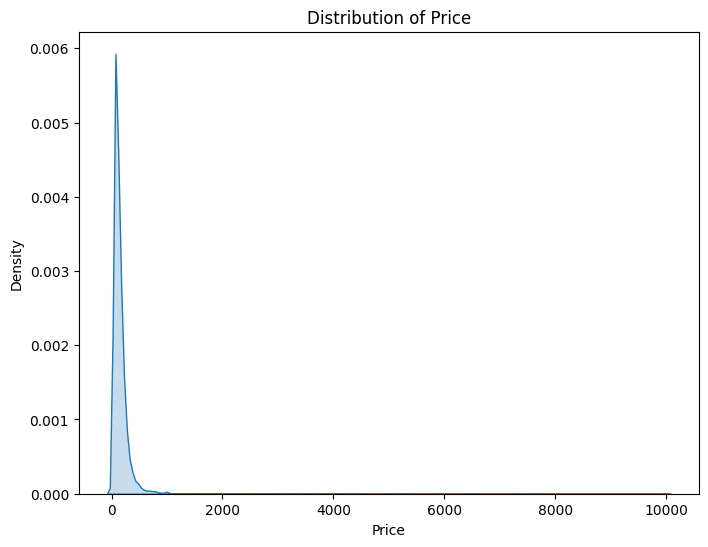

In [30]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['price'], shade=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Price')



Above Density plot provides a visual representation of the price density.

From density plot we can see that most of the room prices are in range of 0 to 1000.


Text(0.5, 1.0, 'Average Price by Neighborhood Group')

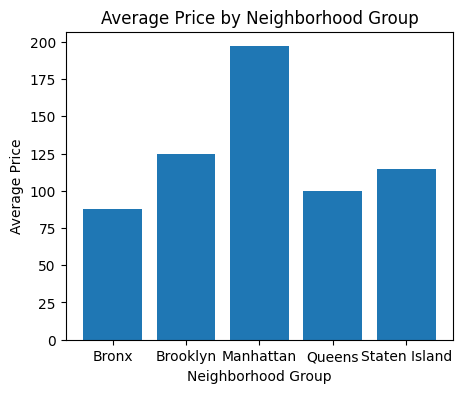

In [31]:
avg_price_neighborhood = df.groupby('neighbourhood_group')['price'].mean()
plt.figure(figsize=(5,4))
plt.bar(avg_price_neighborhood.index, avg_price_neighborhood.values)
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Neighborhood Group')


The bar chart displaying the average price of each neighborhood group.

From above chart we can say that "Manhattan" has the maximum average price and "Bronx" has the minimum average price in neighbourhood group.

Text(0.5, 1.0, 'Average Price by Room Type')

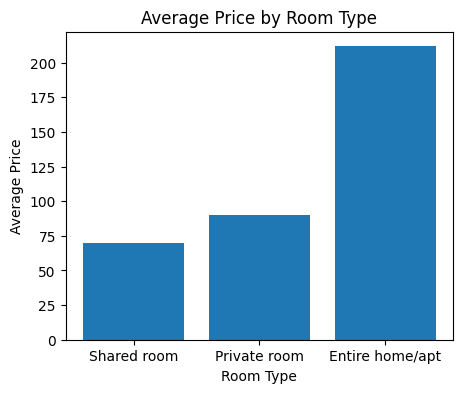

In [32]:
avg_price_room_type = df.groupby('room_type')['price'].mean().sort_values()
plt.figure(figsize=(5,4))
plt.bar(avg_price_room_type.index, avg_price_room_type.values)
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')


The bar chart displaying the average price of each room type

From above chart we can say that "Entire home/apt" has the maximum average price and "Shared room" has the minimum average price.

Text(0.5, 1.0, 'Total Nights Stay by Neighborhood Group')

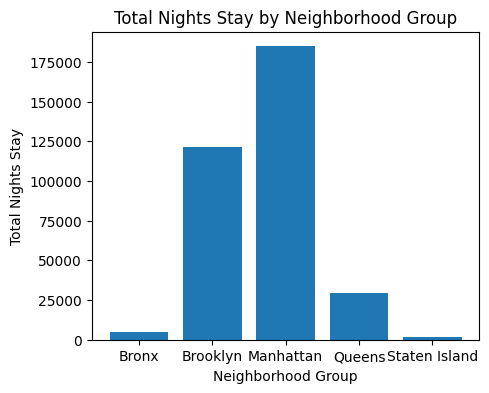

In [33]:
nights_stay_neighborhood = df.groupby('neighbourhood_group')['minimum_nights'].sum()
plt.figure(figsize=(5,4))
plt.bar(nights_stay_neighborhood.index, nights_stay_neighborhood.values)
plt.xlabel('Neighborhood Group')
plt.ylabel('Total Nights Stay')
plt.title('Total Nights Stay by Neighborhood Group')


Bar chart compares the total number of nights stay across different neighborhood groups. Each bar represents the total nights stay for a specific neighborhood group.



From tha above chart we can say that"Manhattan" has the maximum of total night stay and "Staten island " has minimum number of total night stay.

Text(0.5, 1.0, 'Total Nights Stay by Room Type')

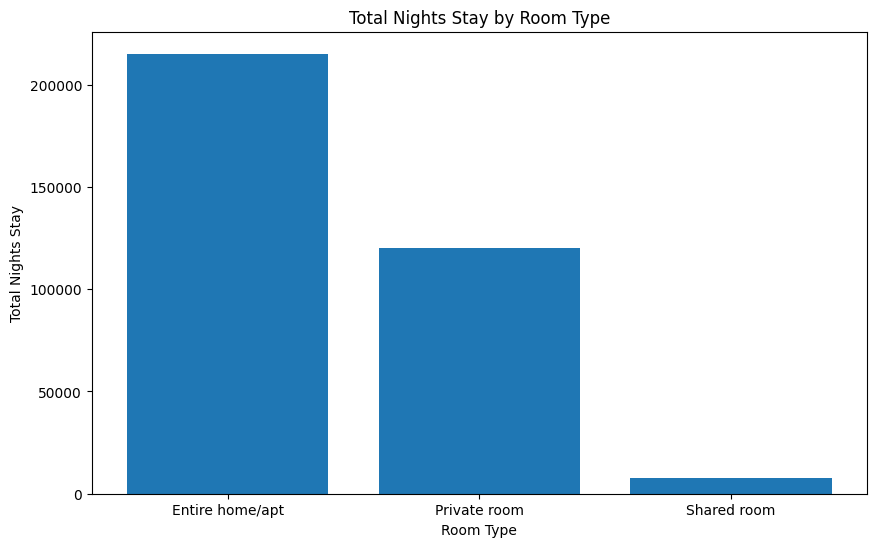

In [34]:
nights_stay_room_type = df.groupby('room_type')['minimum_nights'].sum()
plt.figure(figsize=(10, 6))
plt.bar(nights_stay_room_type.index, nights_stay_room_type.values)
plt.xlabel('Room Type')
plt.ylabel('Total Nights Stay')
plt.title('Total Nights Stay by Room Type')


Bar chart compares the total number of nights stay across different room types. Each bar represents the total nights stay for a specific room type.

From tha above chart we can say that"Entire home/apt" has the maximum of total night stay and "shared room " has minimum number of total night stay.

In [35]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

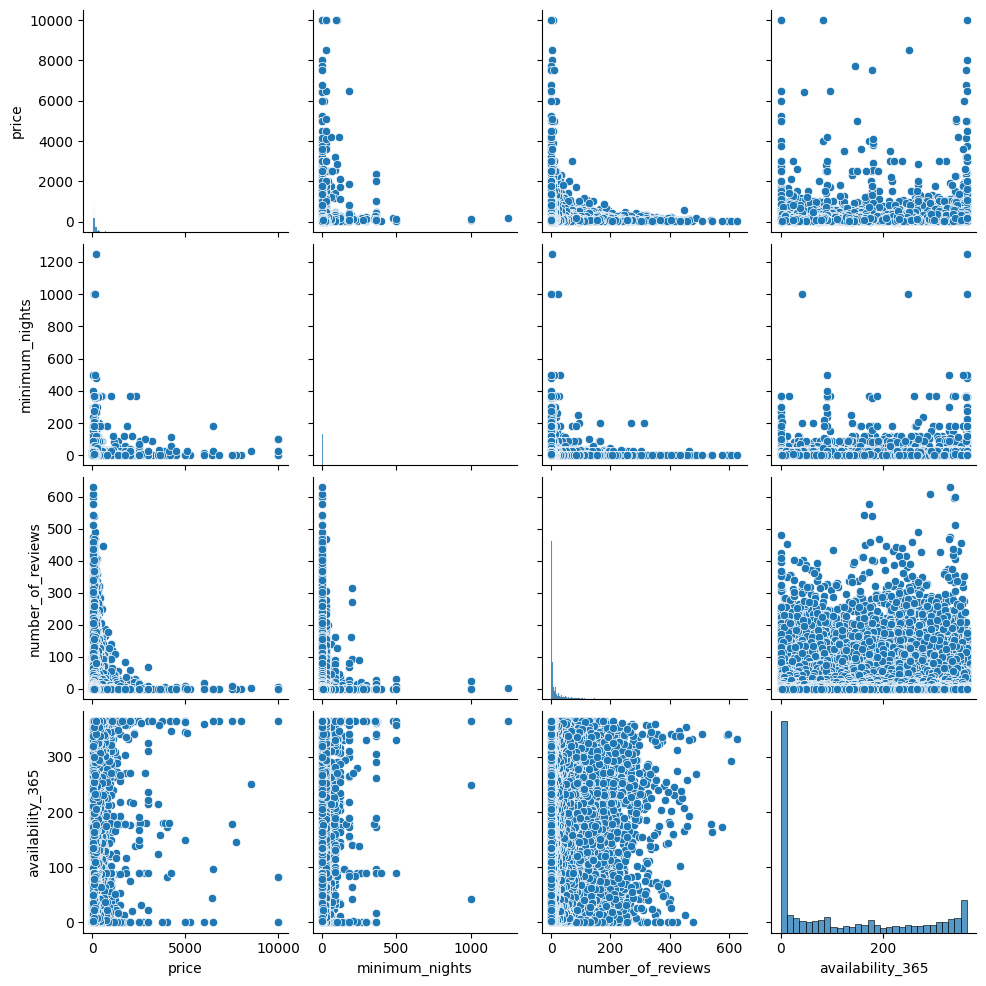

In [36]:
selected_columns = ['price', 'minimum_nights', 'number_of_reviews','neighbourhood_group','host_name','room_type','availability_365']
sns.pairplot(df[selected_columns])


Pairplot is useful for exploring the relationships between multiple variables in the dataset. It can help to identify any patterns, trends, or correlations between the variables.

<ipython-input-37-038fc9e360ab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

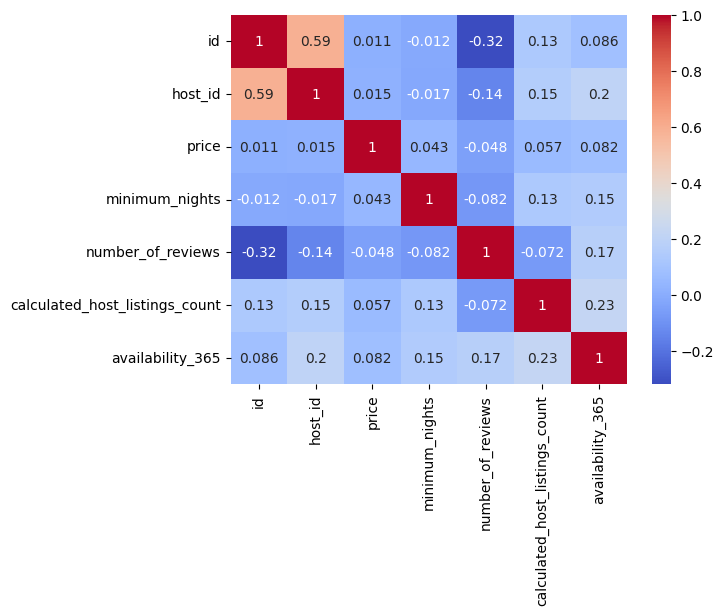

In [37]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

The heatmap will display a color-coded matrix, where each cell represents the correlation coefficient between two variables. The color scale indicates the strength and direction of the correlation: warmer colors (e.g., red) indicate positive correlation, while cooler colors (e.g., blue) indicate negative correlation.

From the above heat map we can say that there is no multicollinearity present in the dataset.

##**Important Insights**

Most reviews are given to rooms with lower price.

Most of the reviews are given to Staten island on the basis of neighbourhood group.

Most people are preferring listings which has low price.

Most people are preferring Entire home/apt (52%) followed by Private
room (45.7%) and least is Shared room(2.4%).

Michael, david, Sounder(NYC), John, Alex are the top 5 host with maximum listing count.

Manhattan area has the highest average price (196.87) and the least
Bronx(87.4967)

Entire home/apt has highest average price (211.806) than others.

Manhattan has the highest count of listing and the least is Staten island.

Availability of shared room type is maximum in all room types.

Most of the rooms are avilable in the price range of 0 to 1000.

Most of the peope are preferring Manhattan for stay.

Most of the people preferred Entire home/apt for more night stays.

##**Conclusion**